In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder




In [33]:
silent = True
%run ../dataLoadAndPrepare.ipynb

# Klassifikationsproblem
Diamanten in eine kategorische Variable einordnen

### Ziel:
Qualität des Schliffs eines Diamanten, durch diskrete Merkmale vorherzusagen.  
Das Modell soll in der Lage sein Diamanten in eine der Klassen der Kategorie cut einzuordnen

Klassen der Kategorie `cut`:  
- Fair
- Good
- Very Good
- Premium
- Ideal

Attribute nach welchen in Klassen zugeordnet wird:
- carat (float)
- color (str)
- clarity (str)
- x (float)
- y (float)
- z (float)
- depth (float)
- table (int)
- price (int)


In [34]:
# LabelEncoder für 'color' und 'clarity'
le_color = LabelEncoder()
le_clarity = LabelEncoder()

# Label Encoding anwenden
df['color'] = le_color.fit_transform(df['color'])
df['clarity'] = le_clarity.fit_transform(df['clarity'])

# # Use one hot encoding instead
# df = pd.get_dummies(df, columns=['color', 'clarity'])

# Zeige das Ergebnis
display(df.head())



,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,6,3,63.3,58.0,335,4.34,4.35,2.75


In [35]:
# Zielvariable festlegen (cut) und in y speichern
y = df['cut']

print(f"\nDie Zielvariable 'cut' enthält folgende Ausprägungen: {y.unique().tolist()}")
print(f"\nAnzahl der verschiedenen Ausprägungen der Zielvariablen:\n{y.value_counts().sort_index()}")

# Inputdaten DataFrame erstellen
X = df.drop('cut', axis=1)
print(f"\nInputdaten DataFrame: {X.shape[1]} Spalten und {X.shape[0]} Zeilen")
print(f"\nDie Inputdaten sehen wie folgt aus:")
{display(X.head())}


Die Zielvariable 'cut' enthält folgende Ausprägungen: ['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']

Anzahl der verschiedenen Ausprägungen der Zielvariablen:
cut
Fair          1610
Good          4906
Ideal        21551
Premium      13791
Very Good    12082
Name: count, dtype: Int64

Inputdaten DataFrame: 9 Spalten und 53940 Zeilen

Die Inputdaten sehen wie folgt aus:


,carat,color,clarity,depth,table,price,x,y,z
0,0.23,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,6,3,63.3,58.0,335,4.34,4.35,2.75


{None}

In [36]:
# Label Encoding
# Die Zielvariable 'cut' wird in numerische Werte umgewandelt
# Die einzelnen Werte von cut sind dann nicht mehr als Kategorien, sondern als Zahlen repräsentiert
# Label Encoding ist notwendig, da so eine natürliche Ordnung der Kategorien hergestellt wird
# Die Ordnung ist wie folgt: Fair < Good < Very Good < Premium < Ideal


cut_mapping = [['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']]

encoder = OrdinalEncoder(categories=cut_mapping)
y = encoder.fit_transform(df[['cut']])

# Konvertiere 'y' in ein 1D-Array
y = y.ravel()

display(y)


array([4., 3., 1., ..., 2., 3., 4.], shape=(53940,))

In [37]:
# Aufteilung in Trainings- und Testdaten
# 80% der Daten werden für das Training verwendet, 20% für das Testen (zufällige Aufteilung)
# random_state wird auf 42 gesetzt, damit die Aufteilung reproduzierbar ist (immer die gleiche Aufteilung)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
# RandomForestClassifier Modell erstellen und trainieren
rf_model = RandomForestClassifier(n_estimators=200, random_state=42, max_features="sqrt", max_depth=None, min_samples_leaf=1, min_samples_split=5)
# Modell trainieren
print("Trainiere Random Forest Modell...")
rf_model.fit(X_train, y_train)


Trainiere Random Forest Modell...


RandomForestClassifier(min_samples_split=5, n_estimators=200, random_state=42)

In [ ]:
# Vorhersagen machen
# Trainiertes Modell wird auf die Testdaten angewendet
y_predicted_test = rf_model.predict(X_test)       # Basierend auf den Testdaten wird der cut vorhergesagt

# Bewertung
print("Test Accuracy (RF):", accuracy_score(y_test, y_predicted_test))        # Hier wird verglichen wie gut die Vorhersagen (y_predicted_test) mit den echten Werten (y_test) übereinstimmen

# Detaillierter Bericht
print("\nDetaillierter Bericht (RF):")
#Ausgabe welche Klasse welcher index entspricht
print(f"\nMapping:{cut_mapping}\n")
print(classification_report(y_test, y_predicted_test))

Test Accuracy (RF): 0.7918984056358918

Detaillierter Bericht (RF):

Mapping:[['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']]

              precision    recall  f1-score   support

         0.0       0.92      0.91      0.91       335
         1.0       0.80      0.70      0.75      1004
         2.0       0.70      0.54      0.61      2382
         3.0       0.78      0.82      0.80      2775
         4.0       0.83      0.92      0.87      4292

    accuracy                           0.79     10788
   macro avg       0.80      0.78      0.79     10788
weighted avg       0.79      0.79      0.79     10788



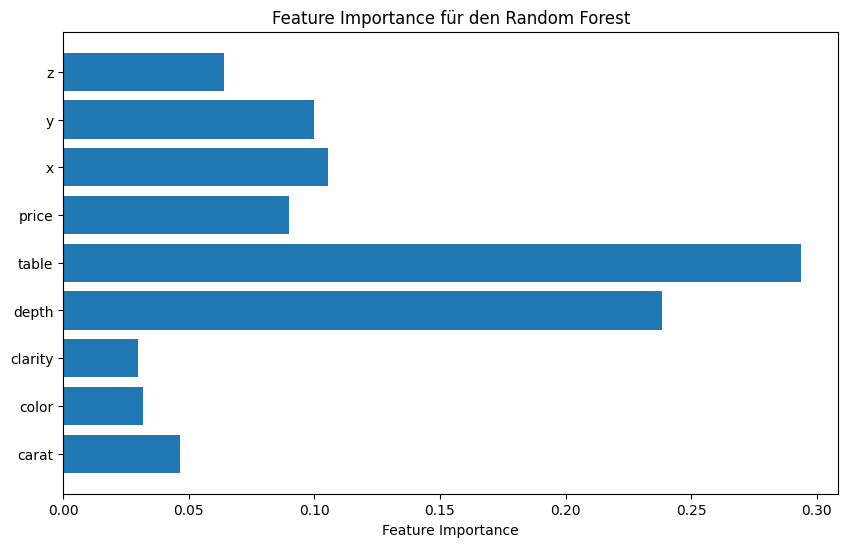

In [40]:

# Feature Importance anzeigen
importance = rf_model.feature_importances_
feature_names = X.columns

# Visualisierung der Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance)
plt.xlabel('Feature Importance')
plt.title('Feature Importance für den Random Forest')
plt.show()


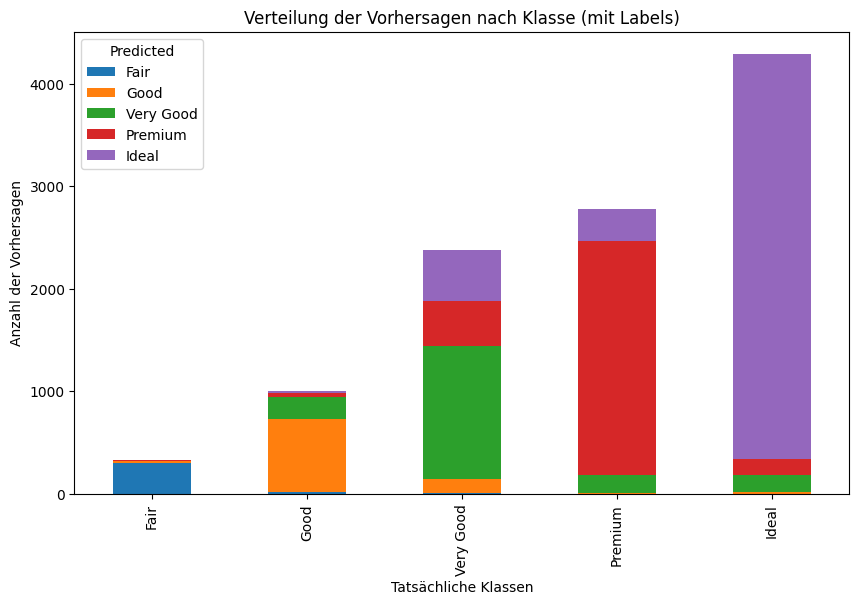

In [41]:
# Rücktransformation der numerischen Werte in Kategorien
y_test_str = encoder.inverse_transform(y_test.reshape(-1, 1)).ravel()
y_predicted_test_str = encoder.inverse_transform(y_predicted_test.reshape(-1, 1)).ravel()

# Erstelle eine Kreuztabelle
results_str = pd.DataFrame({
    'True': pd.Categorical(y_test_str, categories=cut_mapping[0], ordered=True),  # Reihenfolge beibehalten
    'Predicted': pd.Categorical(y_predicted_test_str, categories=cut_mapping[0], ordered=True)  # Reihenfolge beibehalten
})

# Zähle die korrekten und falschen Vorhersagen für jede Klasse
class_distribution_str = pd.crosstab(results_str['True'], results_str['Predicted'], rownames=['True'], colnames=['Predicted'])
class_distribution_str.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Verteilung der Vorhersagen nach Klasse (mit Labels)')
plt.xlabel('Tatsächliche Klassen')
plt.ylabel('Anzahl der Vorhersagen')
plt.show()


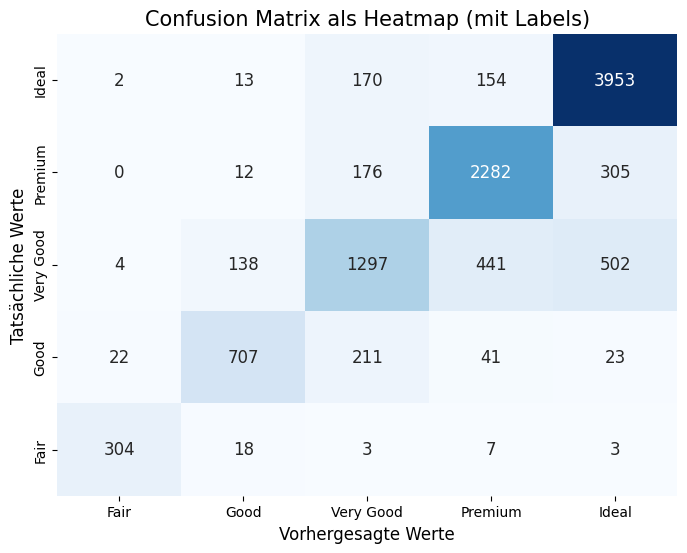

In [43]:
# Rücktransformation der numerischen Werte in Kategorien
y_test_str = encoder.inverse_transform(y_test.reshape(-1, 1)).ravel()
y_predicted_test_str = encoder.inverse_transform(y_predicted_test.reshape(-1, 1)).ravel()

# Erstelle eine Kreuztabelle (Confusion Matrix) mit String-Werten und umgekehrter Reihenfolge der Kategorien
confusion_matrix_str = pd.crosstab(pd.Categorical(y_test_str, categories=cut_mapping[0][::-1], ordered=True),  # Umgekehrte Reihenfolge für y-Achse
                                   pd.Categorical(y_predicted_test_str, categories=cut_mapping[0], ordered=True),
                                   rownames=['Tatsächliche Werte'], colnames=['Vorhergesagte Werte'], margins=False)

# Visualisiere die Kreuztabelle als Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_str, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 12})

# Titel und Achsenbeschriftungen
plt.title('Confusion Matrix als Heatmap (mit Labels)', fontsize=15)
plt.ylabel('Tatsächliche Werte', fontsize=12)
plt.xlabel('Vorhergesagte Werte', fontsize=12)

# Zeige das Diagramm
plt.show()


Erklärung:
- x-Achse die Werte die das Modell vorhergesagt hat
- y-Achse die Anzahl der Werte in die Klasse, in welche es tatsächlich gehört

Werte die auf Diagonale liegen passen

Off-diaganol Werte passen nicht  
Bsp. Oben links 2 Werte wurden durhcs Modell zur Klasse Fair eingeordnet gehören aber tatsächlich zu Klasse Ideal
==> 2 Diamanten wurden zur Klasse Fair eingeteilt obwohl sie eigentlich Ideal sind